## <center>Random Forest Assignment(Fraud Check)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">Using Random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".</code>

In [1]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file and having a glance at the data
Fraud_data=pd.read_csv("Fraud_check.csv")
Fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### Making necessary EDA for the model

In [3]:
#Looking into rows and columns of data
Fraud_data.shape

(600, 6)

In [4]:
#Looking into statistical report of the data
Fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#Checking the datatypes and null values if present any
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
#Checking the duplicate values in the dataset
Fraud_data[Fraud_data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
#Label Encoding the data
label_encoder = preprocessing.LabelEncoder()
Fraud_data['Undergrad']= label_encoder.fit_transform(Fraud_data['Undergrad']) 
Fraud_data['Marital.Status']= label_encoder.fit_transform(Fraud_data['Marital.Status']) 
Fraud_data['Urban']= label_encoder.fit_transform(Fraud_data['Urban']) 

In [8]:
#Finding the average taxable income, which is 30000.Hence anything above that is considered to be highly riskier accounts
Fraud_data["Taxable.Income"]=(Fraud_data["Taxable.Income"]>30000)*1

In [9]:
#Assigning the dependent and independent values
x=Fraud_data.drop(axis=0,columns="Taxable.Income")
y=Fraud_data["Taxable.Income"]

In [10]:
#Spliting the data into train and test model were test data is of 30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#### Building the Random Forest Classifier Model

In [11]:
#Building an Random Forest Classifier with features=3 
model = RandomForestClassifier(n_estimators=120, max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=120)

In [12]:
#Predicting the train data accuracy on the built model
Y_pred=model.predict(x_train)

In [13]:
#Printing the train data accuracy
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [14]:
#Predicting the test data accuracy on the built model
y_pred=model.predict(x_test)

In [15]:
#Printing the test data accuracy
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.6944444444444444


In [16]:
#Finding the better features for the model in the range of 1 to 10
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=120, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [17]:
#Printing the accuracies 
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.688889
1,2,1.0,0.694444
2,3,1.0,0.688889
3,4,1.0,0.705556
4,5,1.0,0.705556
5,6,1.0,0.711111
6,7,1.0,0.688889
7,8,1.0,0.694444
8,9,1.0,0.711111


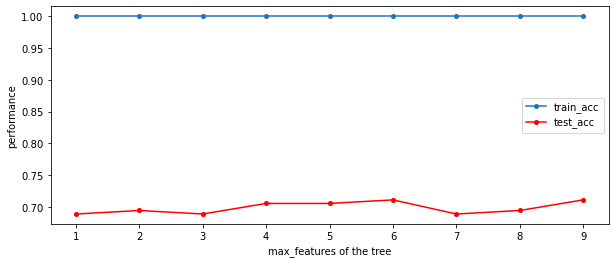

In [18]:
#Plotting the graph for the train and test data from 1 to 10 range and finding the best feature
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()

plt.plot(data['max_features'],data['train_acc'], marker = 'o',markersize=4)
plt.plot(data['max_features'], data['test_acc'], marker = 'o',markersize=4, color='red')
ax.set_xticks(np.arange(1,10))

plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

#### Insights Drawn:
>From the plot above max features that contributes is 2 with the accuracy of 76.6%.Thus, it is a good model to classify which accounts are risky and how many are good.